# Climate Data K-Nearest Neighbors Analysis

## Contents
### KNN fit to average temperature data
### KNN fit to full data
### KNN fit to Heathrow data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# import scaled average temp data
climate = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Avg Temp w Date.csv', index_col = False)

In [3]:
# import full scaled weather data
full = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Scaled Climate Data.csv', index_col = False)

In [4]:
# import pleasantness data 
predicts = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Exercise 1.4\Pleasant Weather.csv', index_col = False)

### KNN fit to average temperature data

In [5]:
climate.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  DEBILT_temp_mean  \
0        -0.528623           -1.016876           -1.099163         -0.114356   
1        -0.582946           -1.107669           -1.110927         -0.367511   
2        -0.257010           -1.084971           -1.063873         -0.509912   
3        -0.555784           -1.209812           -1.146217         -0.525734   
4        -1.003946           -1.209812           -1.087400         -0.320045   

   DUSSELDORF_temp_mean  GDANSK_temp_mean  HEATHROW_temp_mean  \
0             -0.105836         -0.927601           -0.106469   
1             -0.370915         -0.825294           -0.892676   
2             -0.532908         -0.940389           -0.490837   
3             -0.577088         -1.042696           -0.316124   
4             -0.444548         -0.978754           -0.403481   

   KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0         -0.182904            -1.370824             -0.097084   
1         -0.212437            -1.043881             -0.232112   
2         -0.389635            -0.741156             -0.487164   
3         -0.493001            -0.910682             -0.472161   
4         -0.552067            -0.862246             -0.307127   

   MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0         -0.988280           -0.265742       -0.186575       -1.280450   
1         -0.691740           -0.353714       -0.368598       -0.539569   
2         -0.853490           -0.403983       -0.550620       -0.876333   
3         -0.624345           -0.642763       -0.417137       -0.775304   
4         -0.381721           -0.906678       -0.332193       -0.926848   

   SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0            -0.124331            -0.391072        -0.257321   
1            -0.650834            -0.415953        -0.335759   
2            -0.650834            -0.615003        -0.210258   
3            -0.943336            -0.764290        -0.069069   
4            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean      Date  
0           -0.668215  19600101  
1           -0.548046  19600102  
2           -0.067372  19600103  
3           -0.998679  19600104  
4           -1.509396  19600105

In [6]:
# list climate table columns to compare to pleasant table columns
climate.columns.to_list()

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean',
 'Date']

In [7]:
predicts.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
# List pleasant table columns to compare to climate table columns
predicts.columns.to_list()

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [9]:
# Drop locations from climate table that are not in pleasant table
climate_small = climate.drop(['GDANSK_temp_mean', 'ROMA_temp_mean', 'TOURS_temp_mean'], axis = 1)
climate_small.shape

(22950, 16)

In [10]:
predicts.shape

(22950, 16)

In [11]:
# drop dates from temp and pleasant tables
temp = climate_small.drop(['Date'], axis = 1)
pleasant = predicts.drop(['DATE'], axis = 1)
print(pleasant.shape)
print(temp.shape)

(22950, 15)
(22950, 15)


In [12]:
# import libraries for KNN analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# split data into testing and training sets
X = temp
y = pleasant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [14]:
from sklearn.multioutput import MultiOutputClassifier

# train and fit KNN model
k_range = np.arange(1,15)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
i - 1
i - 2
i - 3
i - 4
i - 5
i - 6
i - 7
i - 8
i - 9
i - 10
i - 11
i - 12
i - 13


<function matplotlib.pyplot.show(close=None, block=None)>

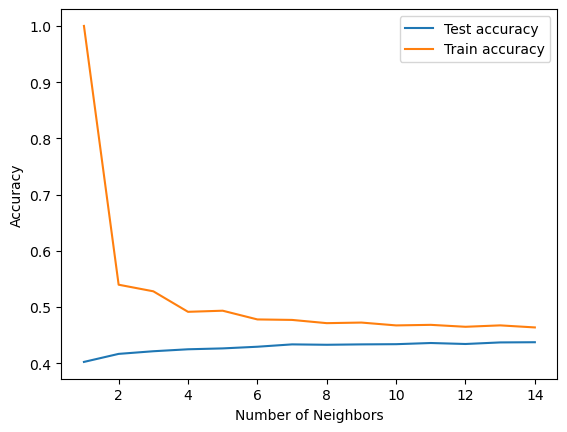

In [15]:
# plot the relationship between n and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

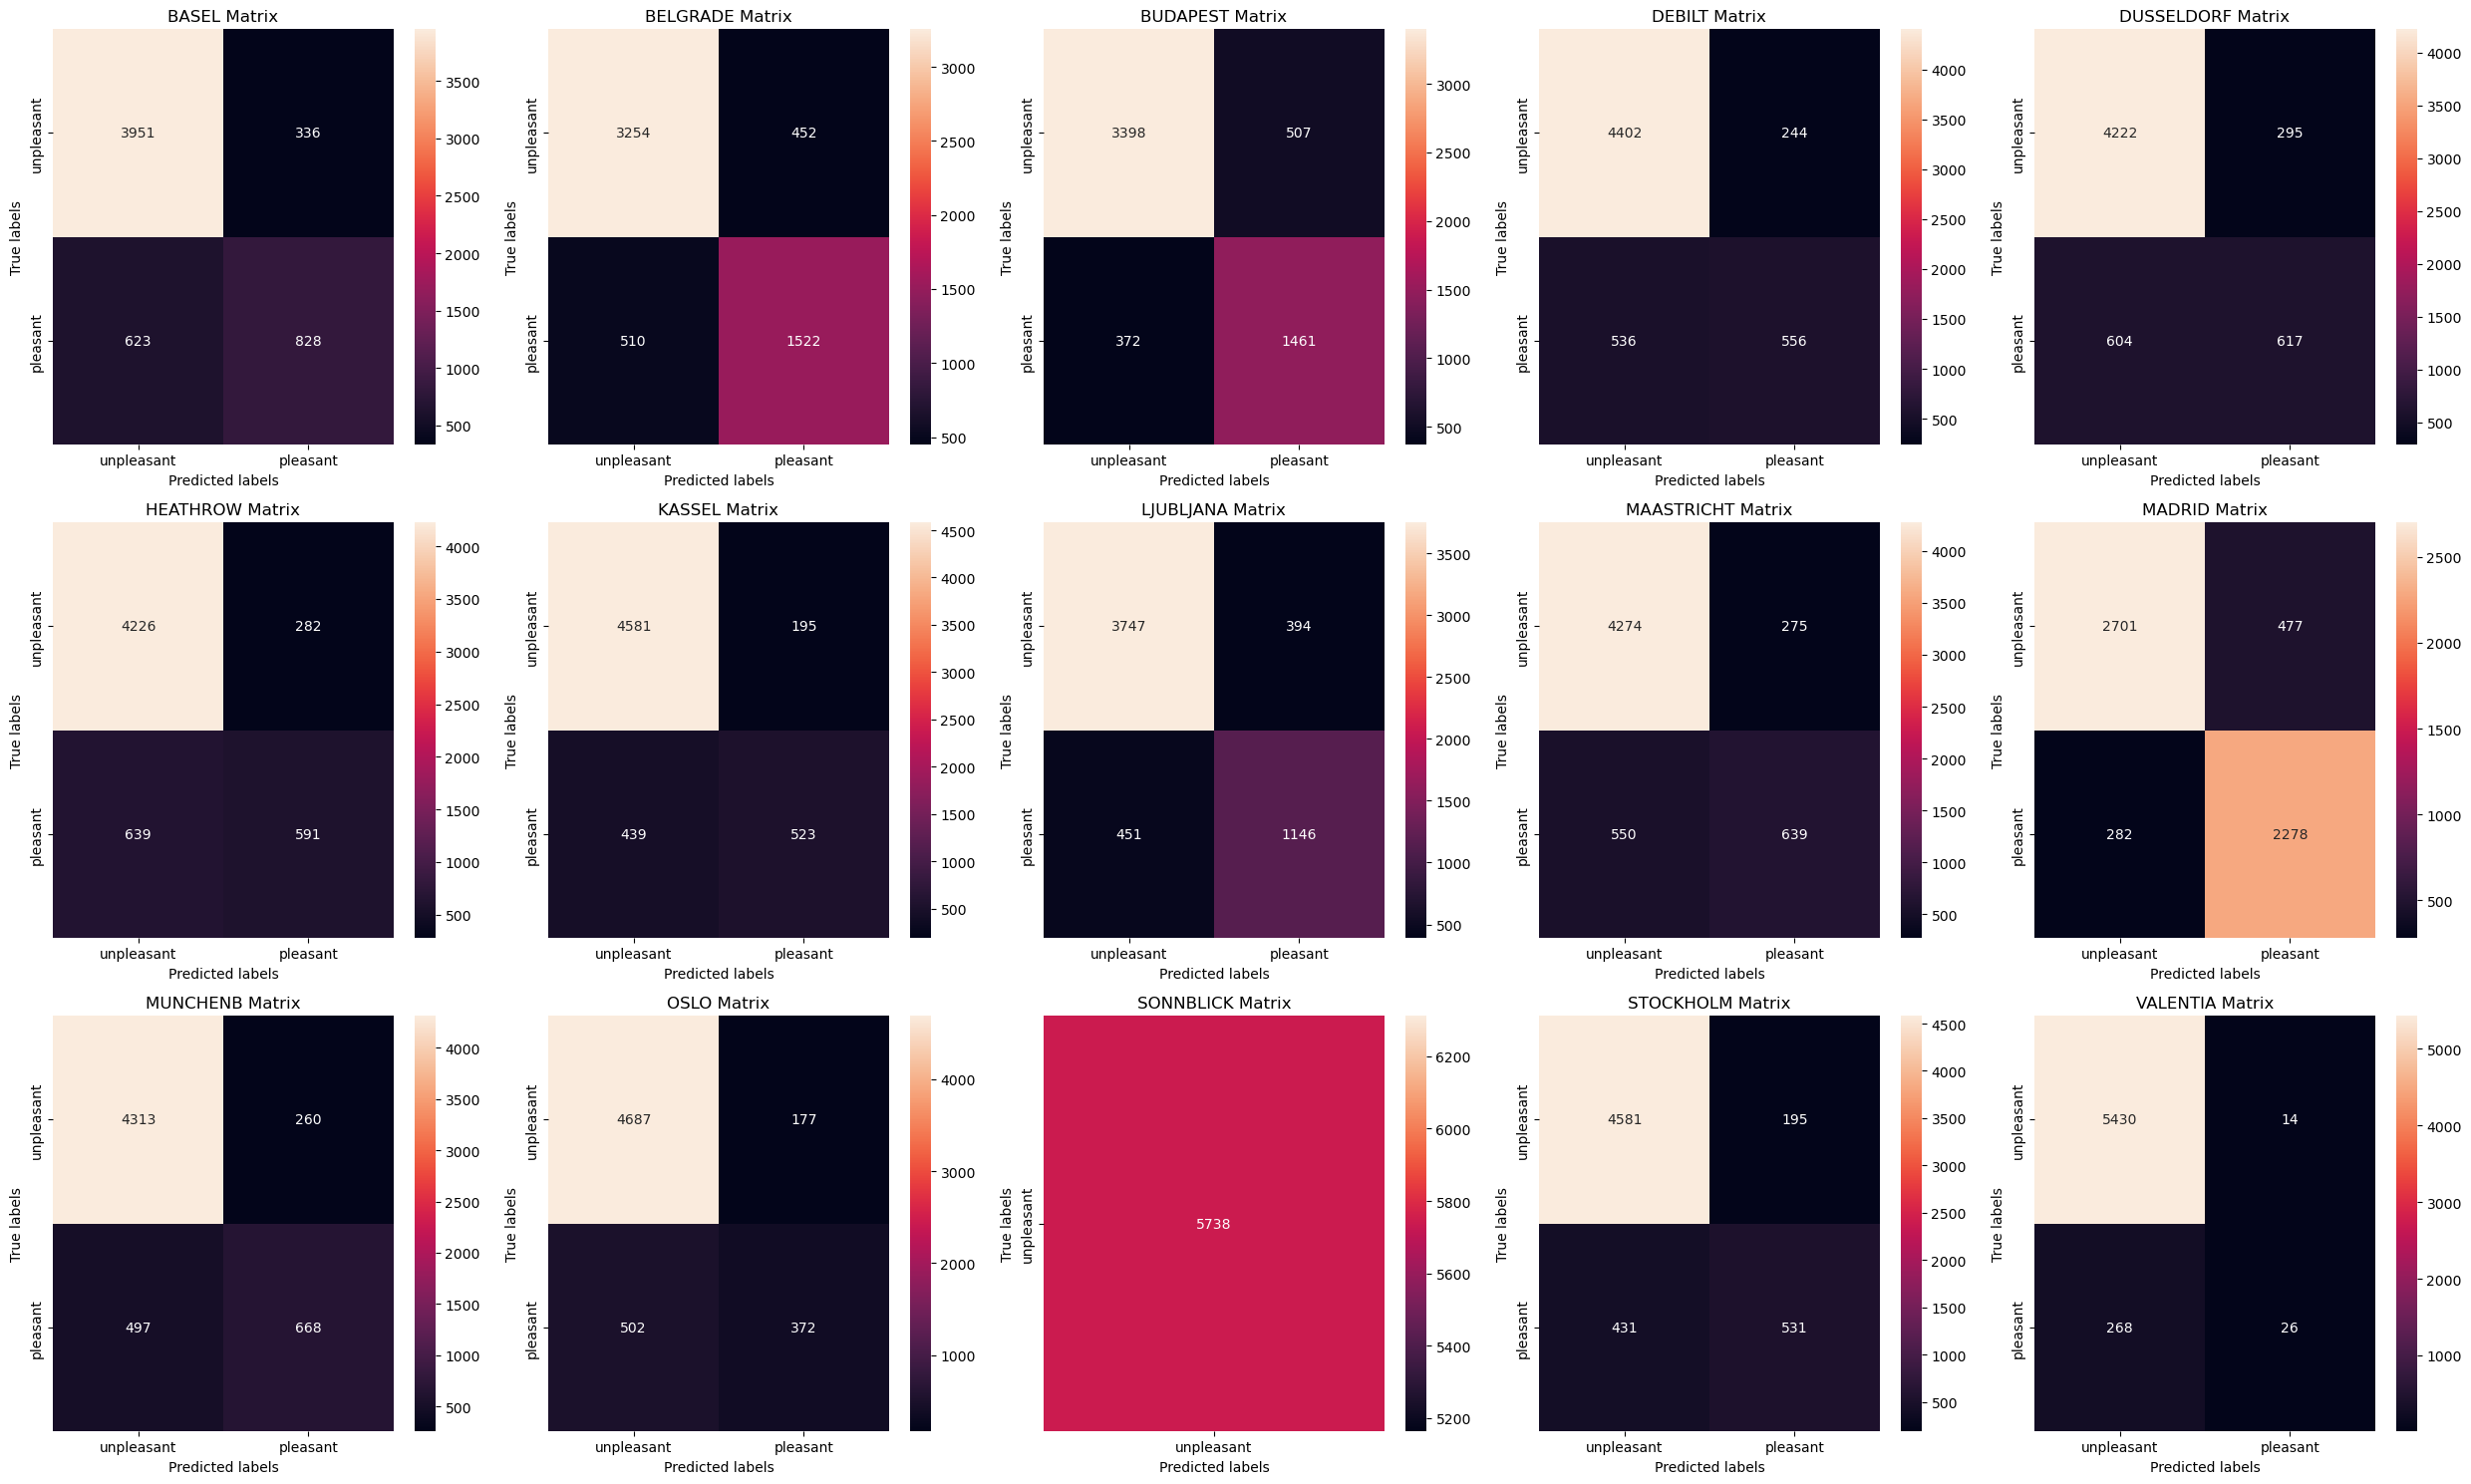

In [17]:
# Create Confusion Matrix for testing data using n = 14
locations = list({x.split("_")[0] for x in pleasant.columns})
locations.sort()

key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  
labels = ['unpleasant', 'pleasant']  
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])            
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            if cm.shape == (2, 2): 
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
            else:  
                unique_labels = [labels[i] for i in np.unique(y_test[name + key])]
                ax[i, j].xaxis.set_ticklabels(unique_labels)
                ax[i, j].yaxis.set_ticklabels(unique_labels)
            count += 1

plt.tight_layout()
plt.show()

### KNN fit to full data

In [18]:
# list weather data columns
full.columns.to_list()

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [19]:
# remove GDANSK, ROMA, and TOURS entries
full.drop([col for col in full.columns if 'ROMA' in col or 'TOURS' in col or 'GDANSK' in col], axis = 1, inplace = True)
full.shape

(22950, 149)

In [20]:
# drop the Date and Month columns
full.drop(['Date', 'Month'], axis= 1, inplace = True)

In [21]:
full.shape

(22950, 147)

In [36]:
# split data into testing and training sets
X1 = full
y1 = pleasant
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=5)

In [37]:
# convert training and test data to arrays
X1_train = X1_train.values
X1_test = X1_test.values
y1_train = y1_train.values
y1_test = y1_test.values

In [24]:
X1_train.shape

(17212, 147)

In [25]:
y1_train.shape

(17212, 15)

In [39]:
# train and fit the KNN model
k_range = np.arange(1,15)
train_acc1 = np.empty(len(k_range))
test_acc1 = np.empty(len(k_range))
scores1 = {}
scores_list1 = []
for i, k in enumerate(k_range):
    print("i -", i)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    knn.fit(X1_train, y1_train)
    y1_pred_train = knn.predict(X1_train)
    y1_pred = knn.predict(X1_test)
    train_acc1[i] = knn.score(X1_train, np.array(y1_train))
    test_acc1[i] = knn.score(X1_test, np.array(y1_test)) 

i - 0
i - 1
i - 2
i - 3
i - 4
i - 5
i - 6
i - 7
i - 8
i - 9
i - 10
i - 11
i - 12
i - 13


<function matplotlib.pyplot.show(close=None, block=None)>

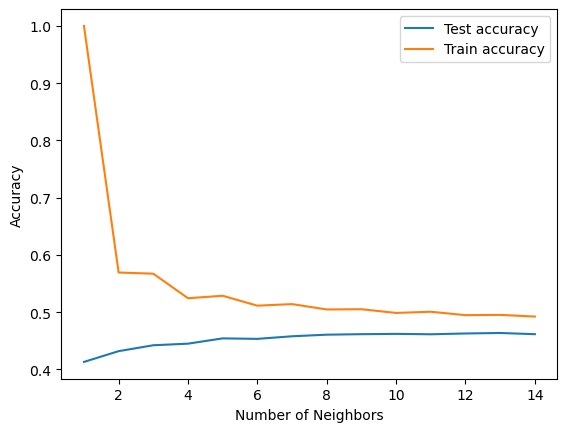

In [40]:
# plot the relationship between n and accuracy
plt.plot(k_range, test_acc1, label = 'Test accuracy')
plt.plot(k_range, train_acc1, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show
# The low accuracy scores show that the KNN model is underfitting the data
# Will repeat the KNN fit using data from a single location. 

In [64]:
 train_acc1

array([1.        , 0.56937021, 0.56727864, 0.52445968, 0.52875901,
       0.5114455 , 0.51417616, 0.50482222, 0.50522891, 0.49877992,
       0.50087149, 0.49488729, 0.49535208, 0.49244713])

In [65]:
test_acc1

array([0.41321018, 0.43203207, 0.4423144 , 0.44510282, 0.45433949,
       0.45346811, 0.4579993 , 0.46078773, 0.46165911, 0.46218194,
       0.46148484, 0.46287905, 0.46375044, 0.46165911])

In [41]:
# split data into testing and training sets, keep as df
X1 = full
y1 = pleasant
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=5)

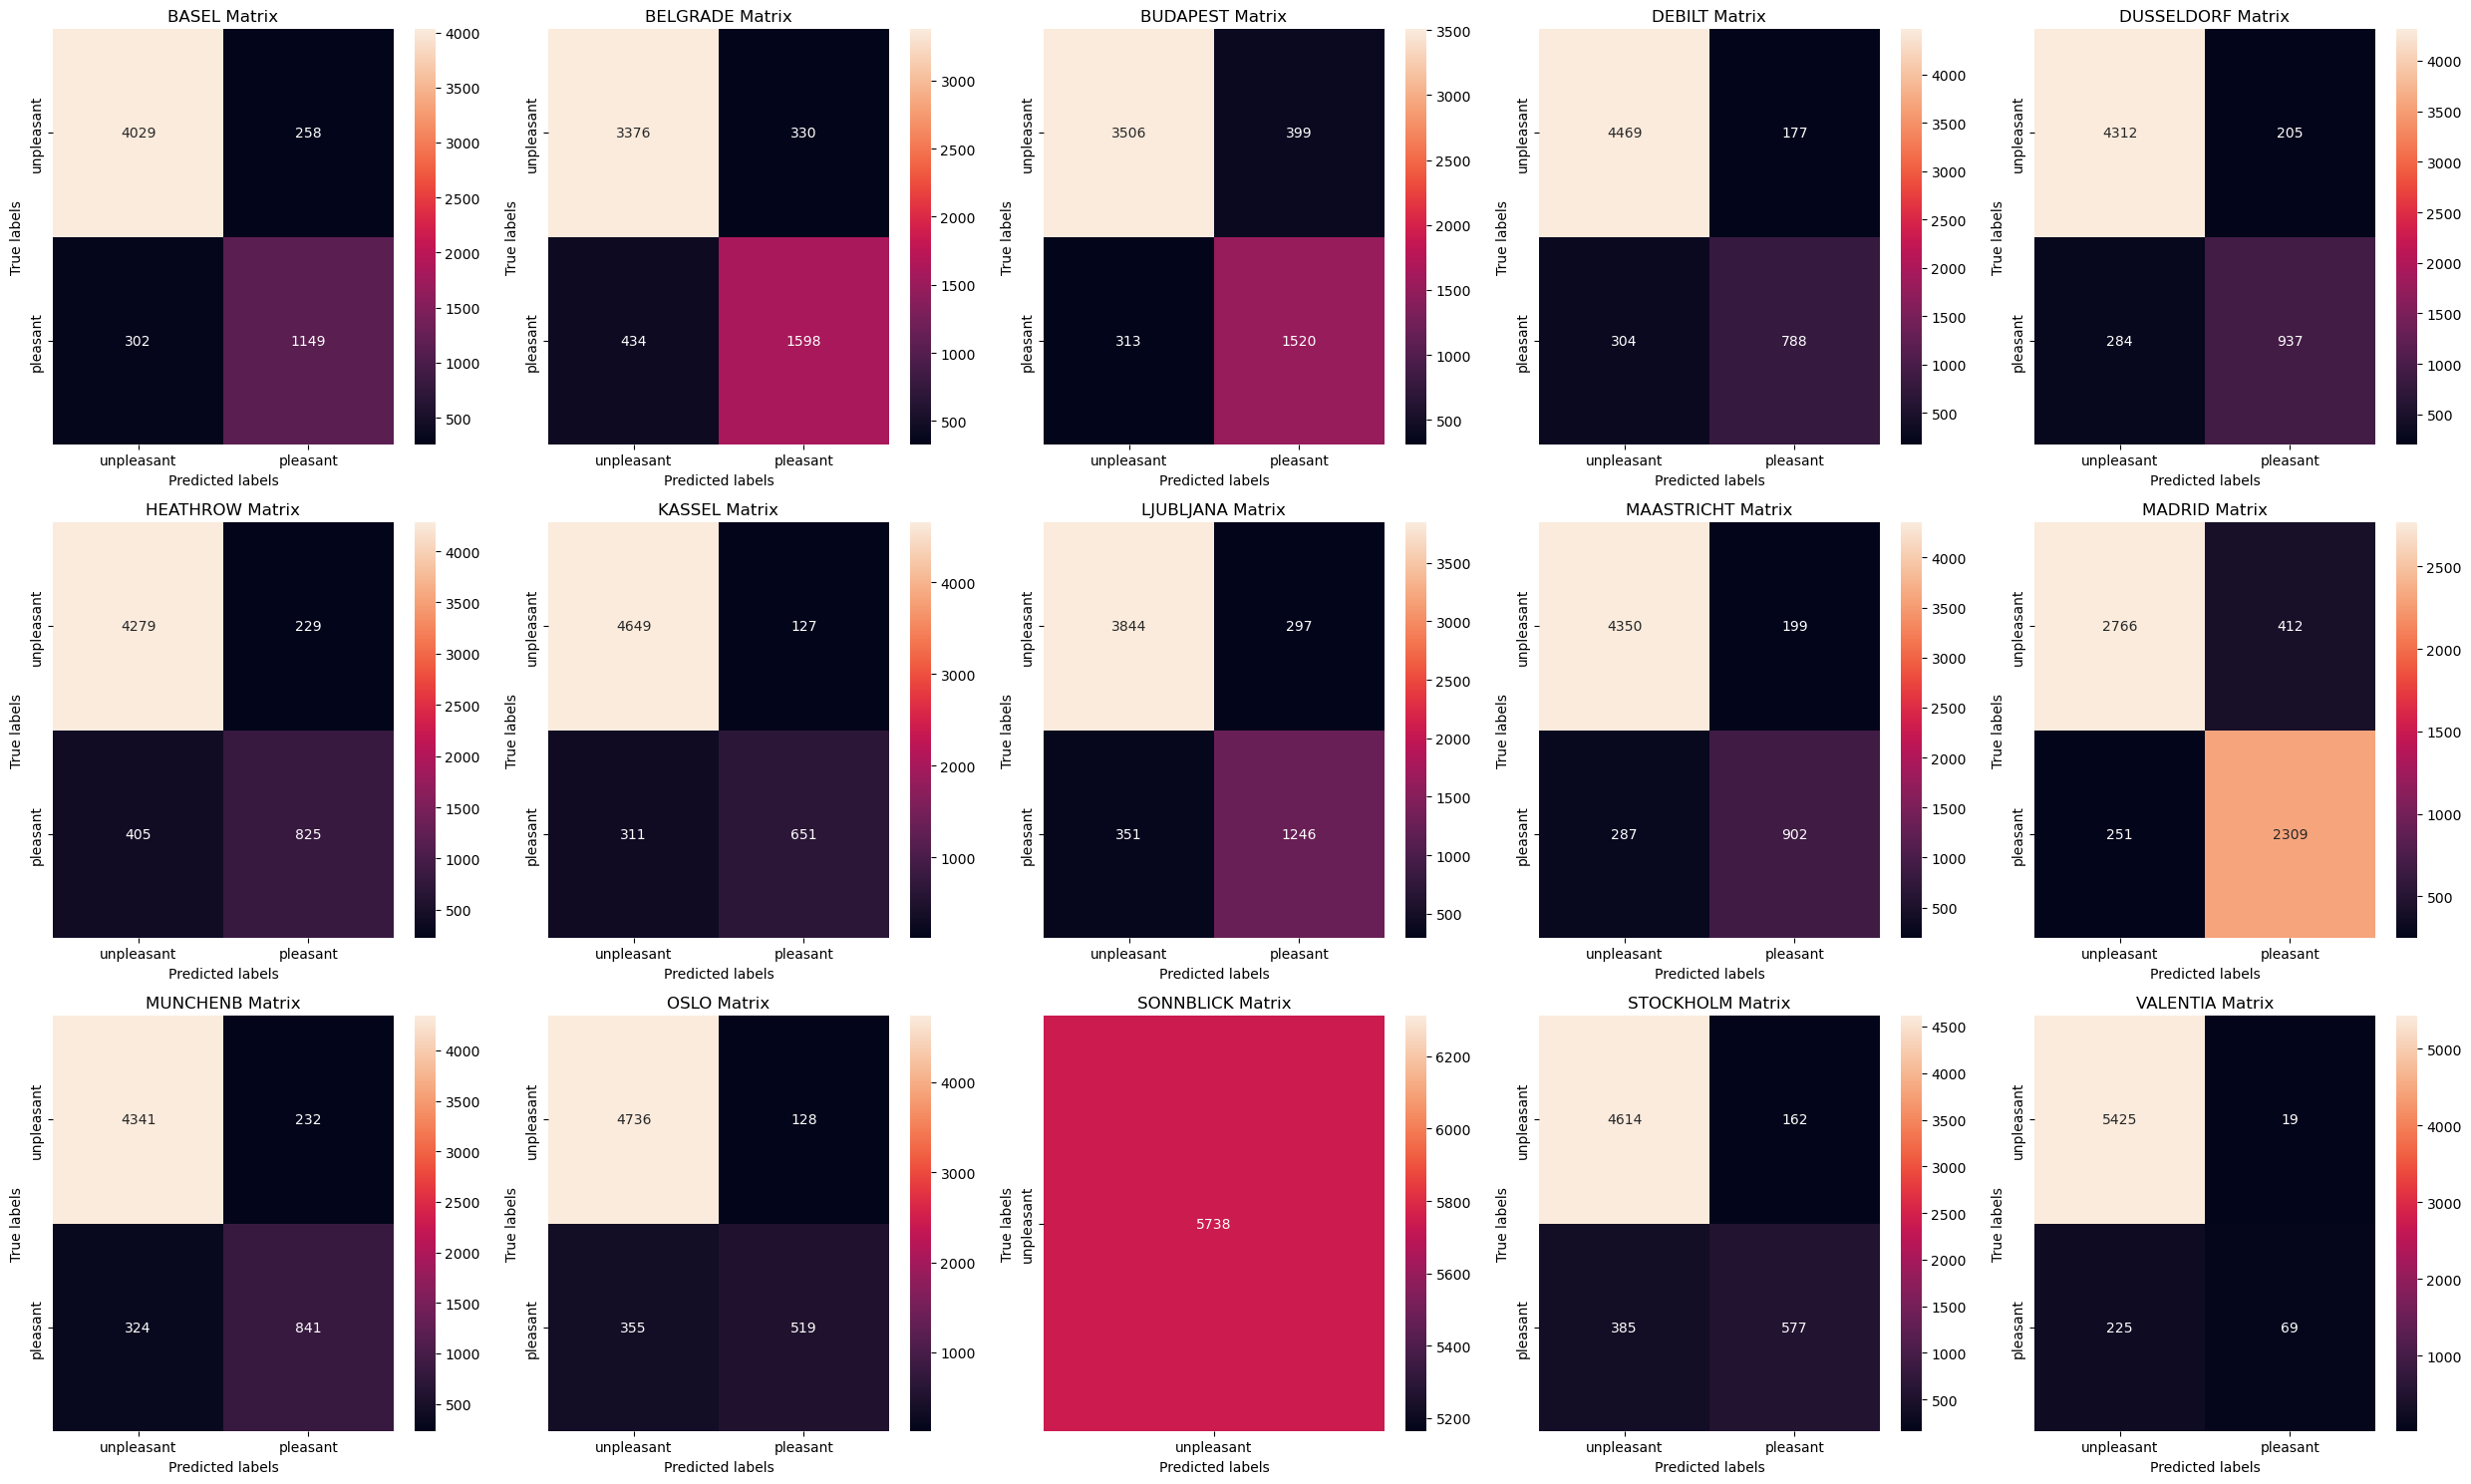

In [42]:
# Create Confusion Matrix for testing data using n = 14
locations = list({x.split("_")[0] for x in pleasant.columns})
locations.sort()

key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  
labels = ['unpleasant', 'pleasant']  
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  
            name = locations[count]
            cm = confusion_matrix(y1_test.loc[:,name+key], y1_pred[:,count])            
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            if cm.shape == (2, 2): 
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
            else:  
                unique_labels = [labels[i] for i in np.unique(y1_test[name + key])]
                ax[i, j].xaxis.set_ticklabels(unique_labels)
                ax[i, j].yaxis.set_ticklabels(unique_labels)
            count += 1

plt.tight_layout()
plt.show()

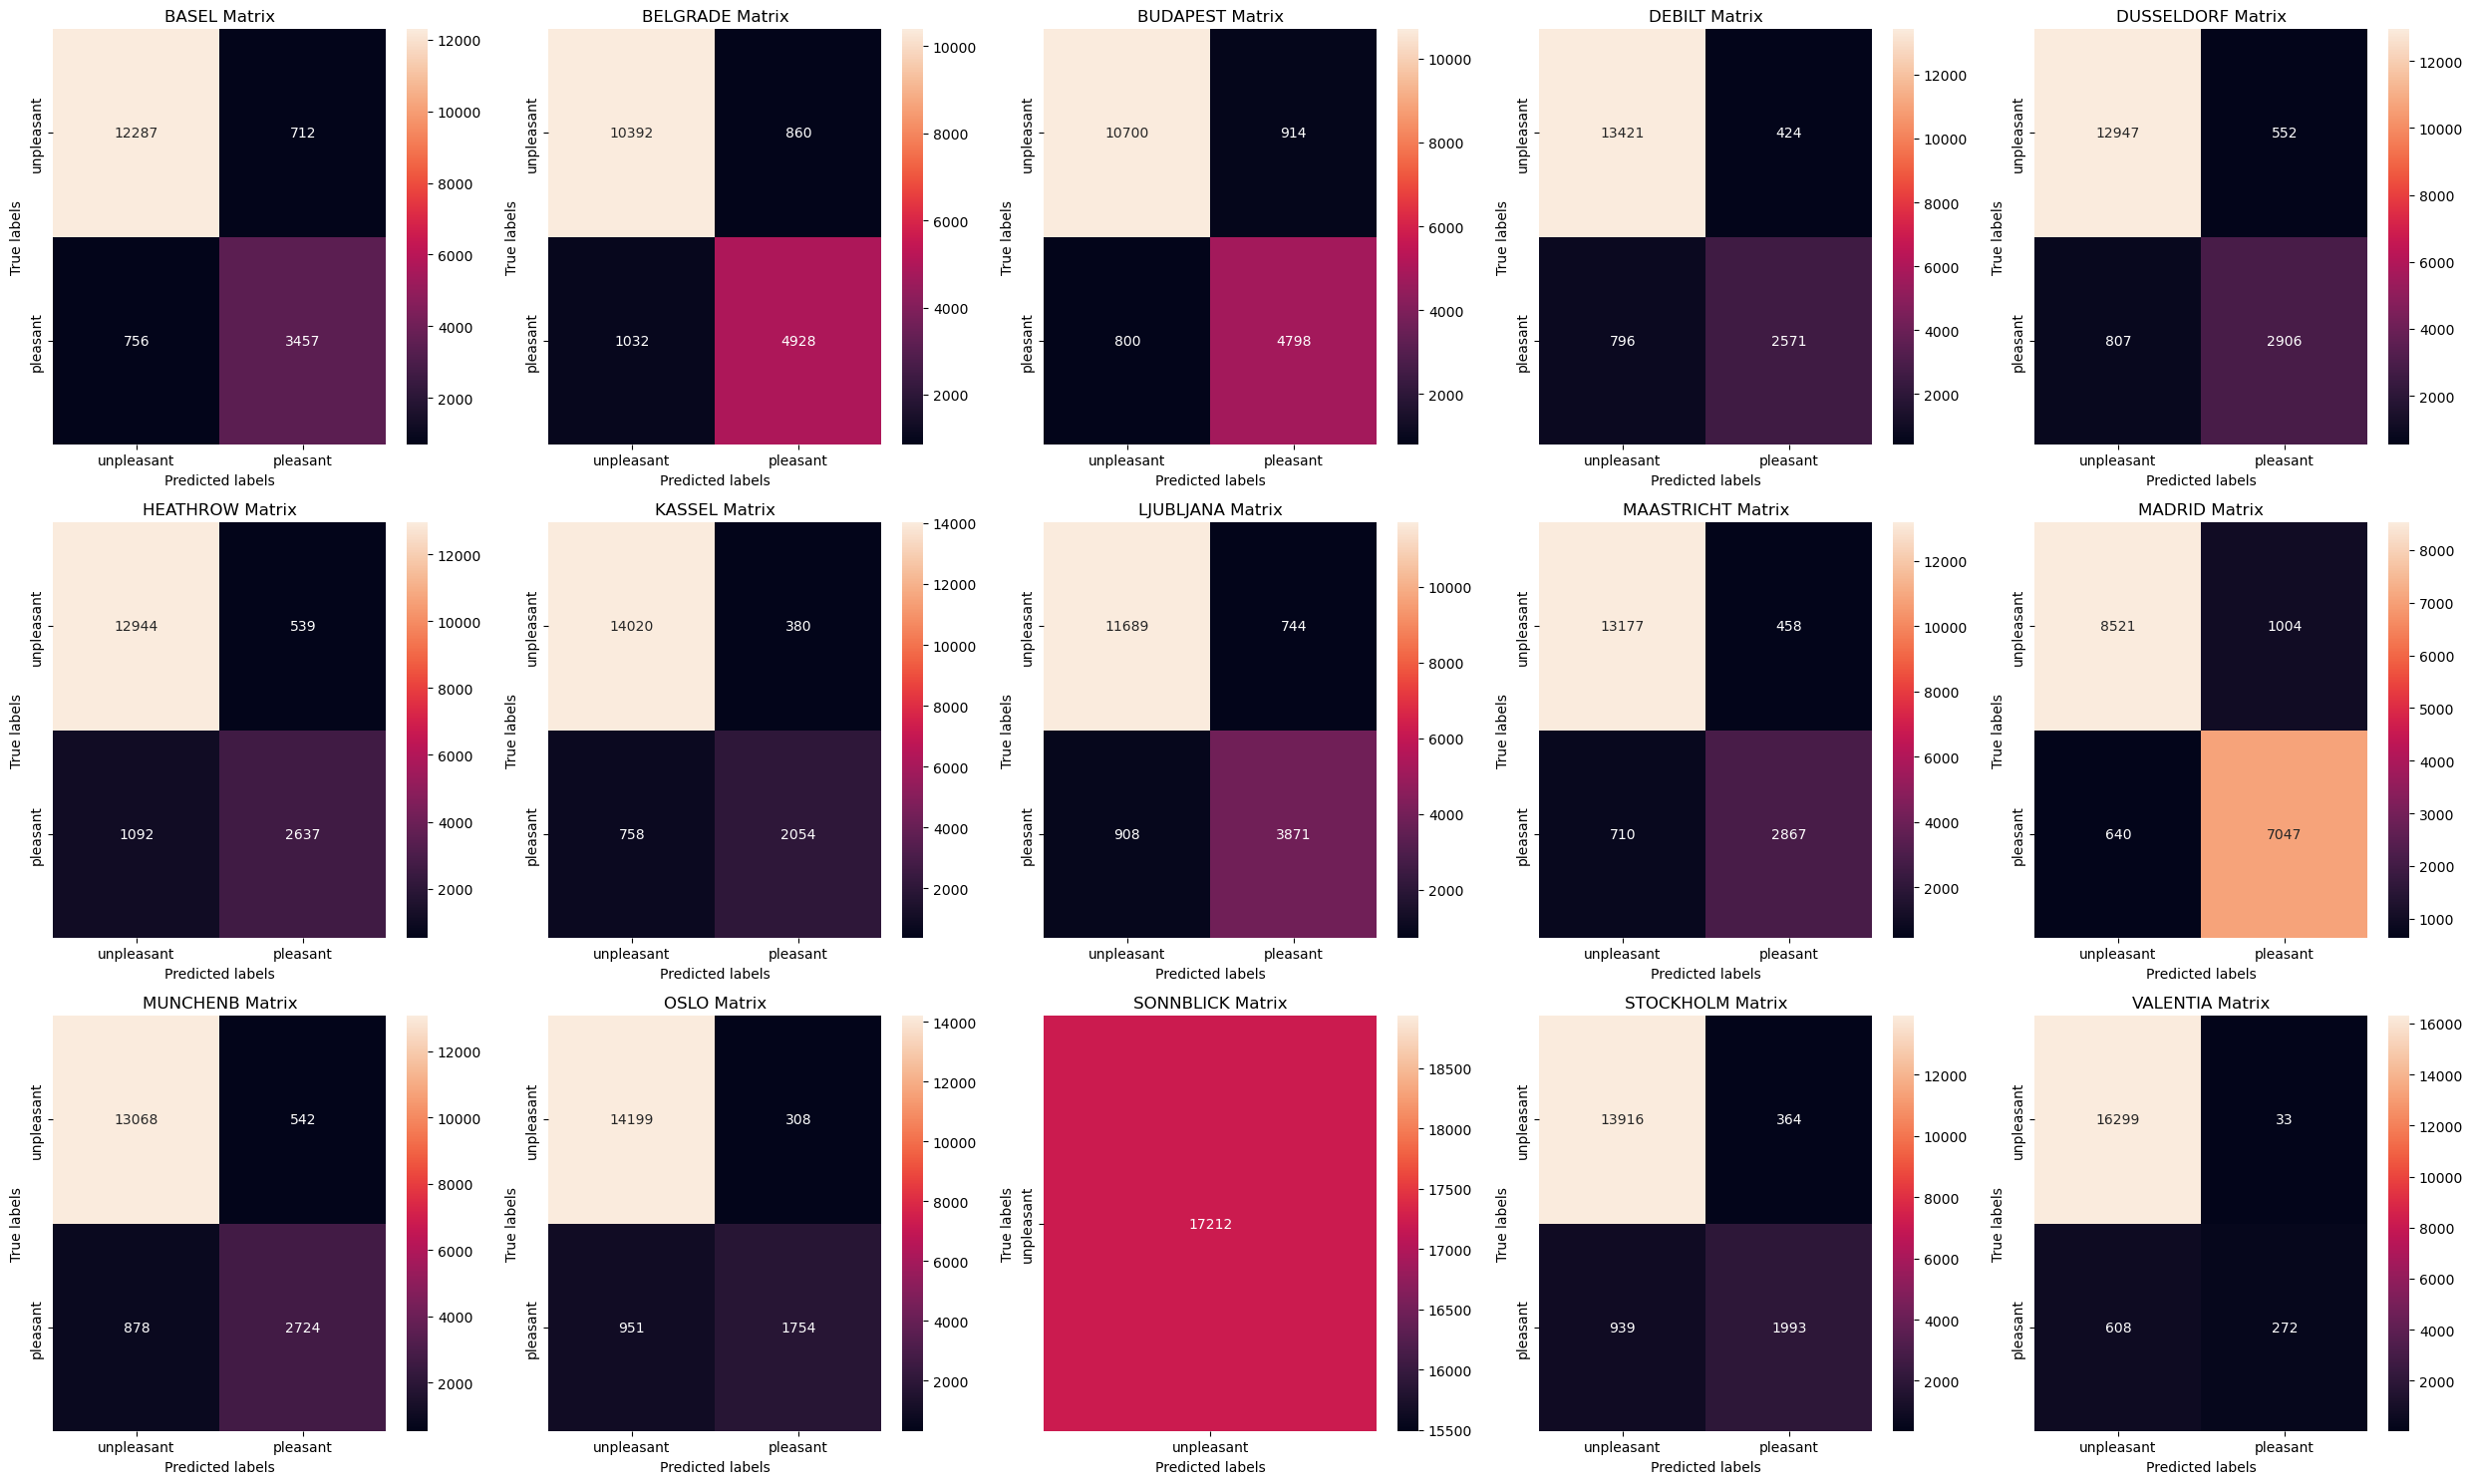

In [45]:
# Create Confusion Matrix for training data using n = 14
locations = list({x.split("_")[0] for x in pleasant.columns})
locations.sort()

key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  
labels = ['unpleasant', 'pleasant']  
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  
            name = locations[count]
            cm = confusion_matrix(y1_train.loc[:,name+key], y1_pred_train[:,count])            
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            if cm.shape == (2, 2): 
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
            else:  
                unique_labels = [labels[i] for i in np.unique(y1_test[name + key])]
                ax[i, j].xaxis.set_ticklabels(unique_labels)
                ax[i, j].yaxis.set_ticklabels(unique_labels)
            count += 1

plt.tight_layout()
plt.show()

### KNN fit to Heathrow data

In [46]:
full.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0       -0.902918        -0.528623       -0.845652  ...             -0.443701   
1       -0.810126        -0.582946       -0.462450  ...              0.783085   
2       -1.065304        -0.257010       -0.186545  ...              0.783085   
3       -0.114186        -0.555784       -0.385810  ...              0.783085   
4        0.187388        -1.003946       -1.075573  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 147 columns]

In [47]:
# create table with Heathrow data only
Heathrow = full[[col for col in full.columns if 'HEATHROW' in col]]
Heathrow.head()

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0              0.833387           1.332572          -1.376592   
1              0.833387           2.004870          -0.984359   
2              1.324799           1.812785           0.115808   
3              1.324799           2.004870           0.728074   
4             -0.149436           0.660275           1.158574   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_snow_depth  \
0                  -1.187370                0.141032            -0.073841   
1                  -1.187370                0.167279            -0.073841   
2                  -1.164817               -0.252671            -0.073841   
3                  -1.187370               -0.436400            -0.073841   
4                  -0.995669               -0.436400            -0.073841   

   HEATHROW_sunshine  HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0          -1.064721           -0.106469           0.393470          -1.038492  
1          -1.064721           -0.892676          -0.639866          -0.687774  
2          -1.039671           -0.490837          -0.226532          -0.443796  
3          -1.064721           -0.316124          -0.113804          -0.947000  
4          -0.538678           -0.403481           0.299530          -1.206227

In [48]:
# create Pleasantness table for Heathrow data only
Heathrow_pleasant = pleasant[['HEATHROW_pleasant_weather']]

In [49]:
Heathrow_pleasant.head()

HEATHROW_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [50]:
# split data into testing and training sets
X2 = Heathrow
y2 = Heathrow_pleasant
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=5)

In [51]:
print(X2.shape)
print(y2.shape)
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(22950, 10)
(22950, 1)
(17212, 10)
(17212, 1)
(5738, 10)
(5738, 1)


In [53]:
# train and fit the KNN model
k_range = np.arange(1,20)
train_acc2 = np.empty(len(k_range))
test_acc2 = np.empty(len(k_range))
scores2 = {}
scores_list2 = []
for i, k in enumerate(k_range):
    print("i -", i)
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X2_train, y2_train)
    y2_pred_train = knn.predict(X2_train)
    y2_pred = knn.predict(X2_test)
    train_acc2[i] = knn.score(X2_train, y2_train)
    test_acc2[i] = knn.score(X2_test, y2_test)

i - 0


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 1


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 2


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 3


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 4


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 5


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 6


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 7


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 8


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 9


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 10


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 11


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 12


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 13


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 14


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 15


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 16


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 17


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


i - 18


C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<function matplotlib.pyplot.show(close=None, block=None)>

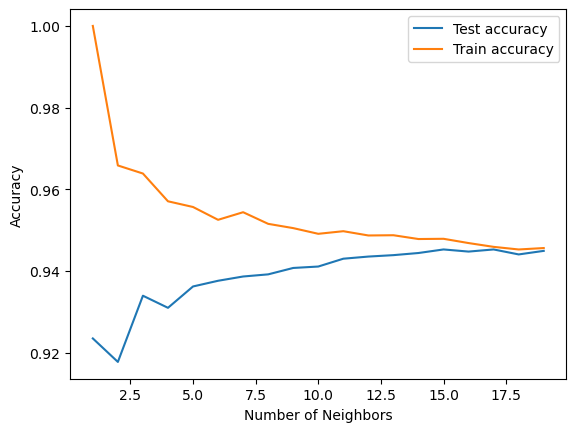

In [54]:
# plot the relationship between n and accuracy
plt.plot(k_range, test_acc2, label = 'Test accuracy')
plt.plot(k_range, train_acc2, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

# The high accuracy scores show that the KNN model fits this data well.
# Neither over nor under fitting is abserved

In [66]:
 train_acc2

array([1.        , 0.96583779, 0.96386242, 0.95706484, 0.95567046,
       0.95253312, 0.95439228, 0.95154543, 0.95049965, 0.94910528,
       0.94974436, 0.94869858, 0.94875668, 0.9478271 , 0.9478852 ,
       0.94683941, 0.94590983, 0.94527074, 0.94561934])

In [67]:
 test_acc2

array([0.92349251, 0.91774137, 0.93394911, 0.93098641, 0.93621471,
       0.93760892, 0.93865458, 0.93917741, 0.9407459 , 0.94109446,
       0.9430115 , 0.94353433, 0.94388289, 0.94440572, 0.9452771 ,
       0.94475427, 0.9452771 , 0.94405716, 0.94492855])

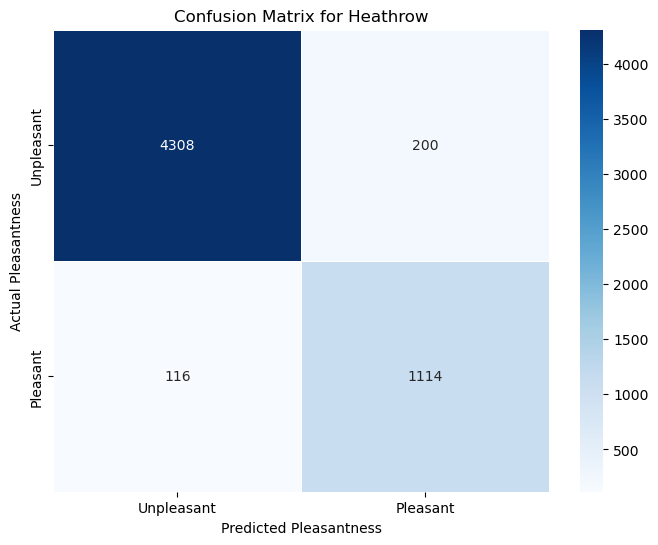

In [56]:
# create a confusion matrix for the Heathrow testing data using n = 18
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')
plt.title('Confusion Matrix for Heathrow')
plt.ylabel('Actual Pleasantness')
plt.xlabel('Predicted Pleasantness')
ax.set_xticklabels(['Unpleasant', 'Pleasant'])
ax.set_yticklabels(['Unpleasant', 'Pleasant'])
plt.show()

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

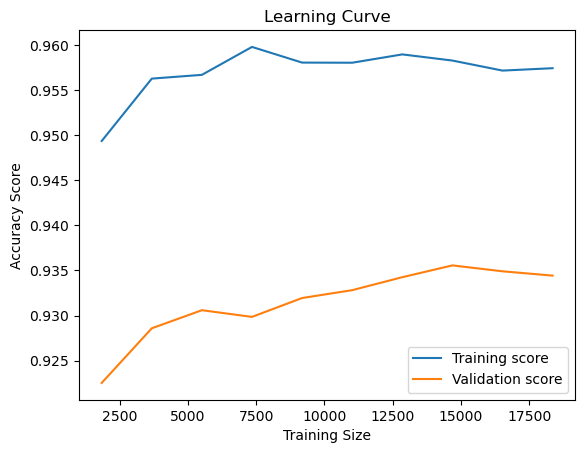

In [106]:
# create learning curve to determine best training data size for Heathrow analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = KNeighborsClassifier(n_neighbors=5),
    X = X2, y = y2, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.show()

# the training dataset size we used (17212) is appropriate. At this size, 
# the validation score is high without a loss in the training score


C:\Users\kacie\AppData\Local\Temp\ipykernel_21932\4280180493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heathrow['HEATHROW_pleasant_weather'] = Heathrow_pleasant['HEATHROW_pleasant_weather']
C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


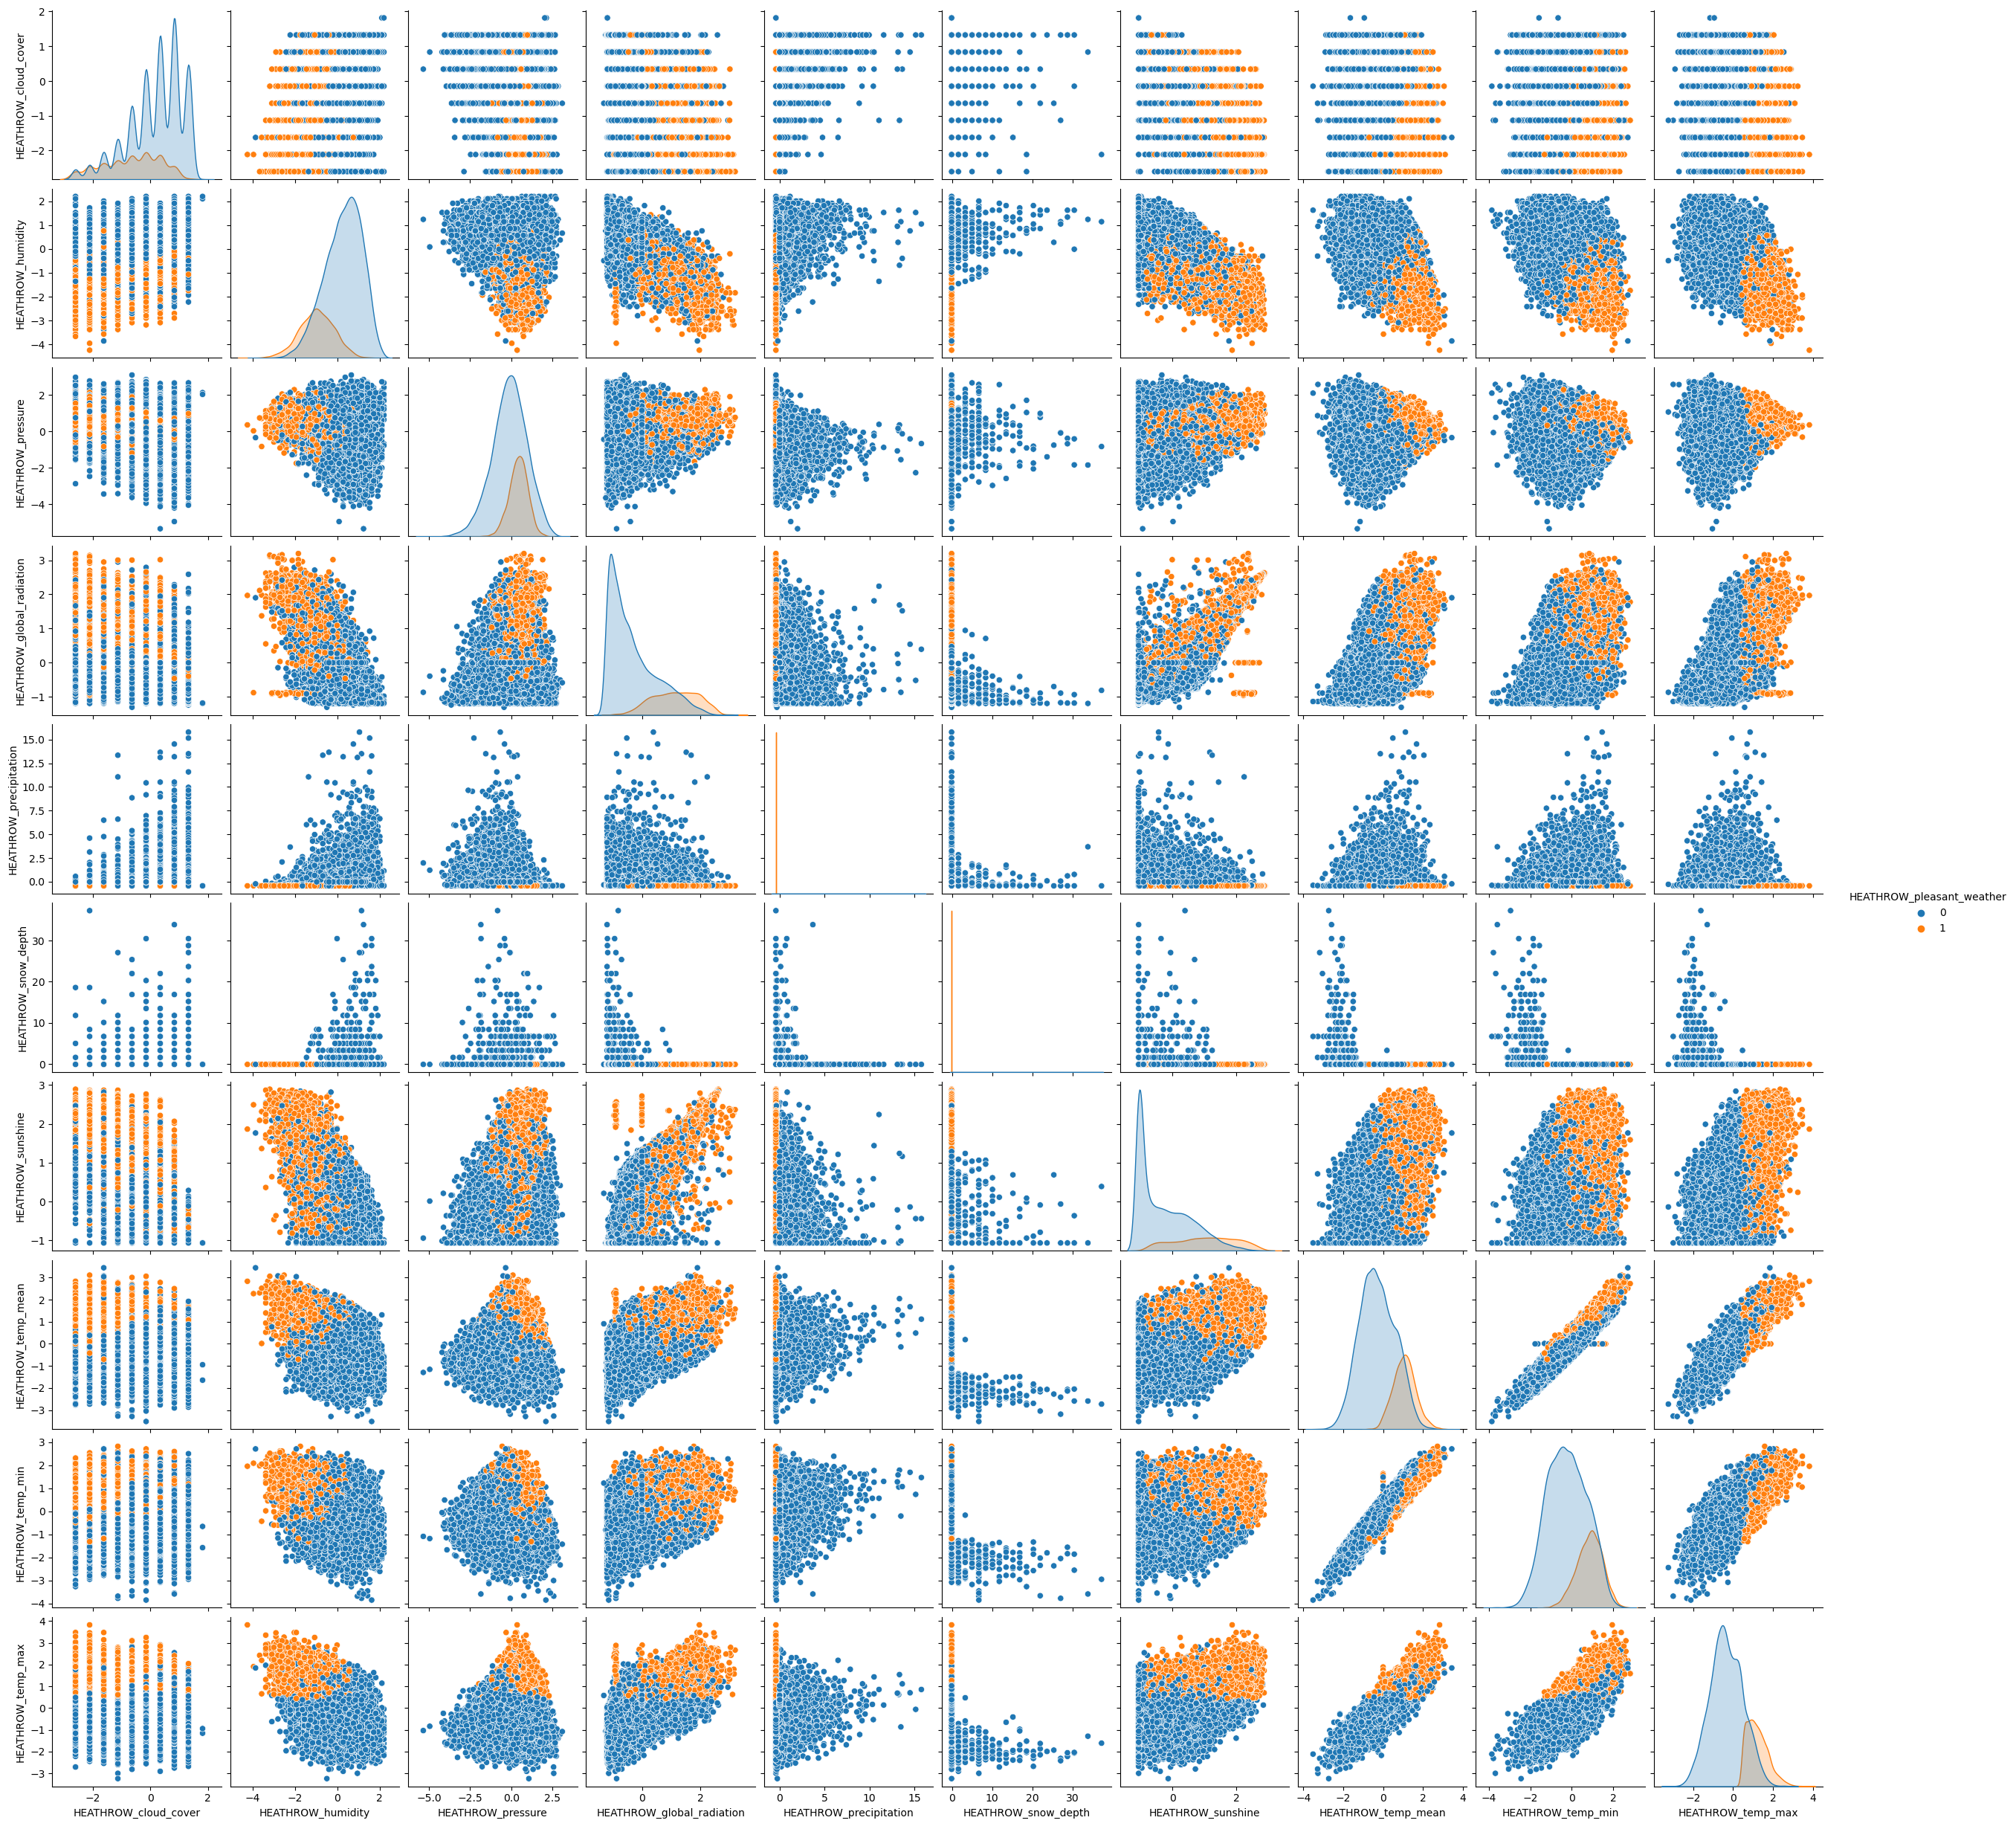

In [63]:
# create a pairplot for Heathrow data
Heathrow['HEATHROW_pleasant_weather'] = Heathrow_pleasant['HEATHROW_pleasant_weather']

sns.pairplot(Heathrow[['HEATHROW_cloud_cover',
                       'HEATHROW_humidity',
                       'HEATHROW_pressure',
                       'HEATHROW_global_radiation',
                       'HEATHROW_precipitation',
                       'HEATHROW_snow_depth',
                       'HEATHROW_sunshine',
                       'HEATHROW_temp_mean',
                       'HEATHROW_temp_min',
                       'HEATHROW_temp_max', 
                       'HEATHROW_pleasant_weather']], hue='HEATHROW_pleasant_weather')
plt.show()